In [59]:
# Importar bibliotecas

# EDA
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, f_oneway, ttest_ind
from colorama import Fore, Back, Style

# Visualização
import plotly.express as px
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Configurar Visualização dos dados
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True, precision=3)

# ML
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, \
                            log_loss, roc_curve, roc_auc_score

# Interpretabilidade
import shap


### Carregar os dados

In [21]:
df_empresas = pd.read_csv('.\dataset\companies_profile.csv')

<>:1: SyntaxWarning:

invalid escape sequence '\d'

<>:1: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\Carolina\AppData\Local\Temp\ipykernel_1800\148995878.py:1: SyntaxWarning:

invalid escape sequence '\d'



### Análise inicial

In [22]:
# Visualizar Estrutura dos dados
df_empresas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         1000 non-null   int64  
 1   Nome_Empresa               1000 non-null   object 
 2   Receita_Anual              1000 non-null   int64  
 3   Margem_Liquida             1000 non-null   float64
 4   Endividamento              1000 non-null   float64
 5   Setor                      1000 non-null   object 
 6   Regiao                     1000 non-null   object 
 7   Tempo_Operacao             1000 non-null   int64  
 8   Auditoria_Externa          1000 non-null   int64  
 9   Rating_Credito             1000 non-null   float64
 10  Tipo_Empresa               1000 non-null   object 
 11  Politica_Sustentabilidade  1000 non-null   object 
 12  Estrategia_Expansao        1000 non-null   object 
 13  Gestao_Risco               1000 non-null   object

In [23]:
# Visualizar primeiras linhas
df_empresas.head(10)

,ID,Nome_Empresa,Receita_Anual,Margem_Liquida,Endividamento,Setor,Regiao,Tempo_Operacao,Auditoria_Externa,Rating_Credito,...,Estrategia_Expansao,Gestao_Risco,Cobertura_Seguros,Maturidade_Digital,Governanca_Corporativa,Cultura_Inovacao,Relacao_Comunidade,Risco_Credito,Risco_Compliance,Risco_Mercado
0,1,Hahn Group,6523388,0.482879,1.032767,Manufatura,Europa,26,0,0.938715,...,Parcerias,Centralizada,Básica,Avançada,Fraca,Neutra,Regular,0,0,0
1,2,Lopez Group,6650634,0.121292,0.492841,Tecnologia,Europa,20,1,0.492362,...,Orgânica,Centralizada,Básica,Inicial,Média,Neutra,Ruim,0,0,0
2,3,Sparks and Sons,4404572,0.190114,0.757099,Manufatura,América Latina,6,0,0.700866,...,Orgânica,Decentralizada,Básica,Inicial,Alta,Neutra,Boa,0,0,0
3,4,"Fields, Ramirez and Craig",2334489,0.402442,2.327962,Manufatura,Europa,6,1,0.855551,...,Parcerias,Centralizada,Nenhuma,Intermediária,Média,Inovadora,Excelente,1,0,0
4,5,"Campbell, Hernandez and Lyons",9624682,0.174549,1.722357,Saúde,América do Norte,18,1,0.418291,...,Aquisições,Decentralizada,Nenhuma,Avançada,Fraca,Neutra,Regular,0,0,0
5,6,Robinson Ltd,7304212,-0.070876,1.290515,Saúde,América do Norte,4,1,0.309413,...,Orgânica,Centralizada,Ampla,Avançada,Alta,Neutra,Ruim,1,0,1
6,7,Bennett LLC,9728519,0.009717,0.130516,Tecnologia,Ásia,17,0,0.936725,...,Parcerias,Decentralizada,Básica,Avançada,Média,Neutra,Regular,0,1,0
7,8,"Rios, Stevens and Johnson",4572471,0.016956,2.481797,Saúde,Europa,14,1,0.515677,...,Parcerias,Centralizada,Nenhuma,Intermediária,Alta,Neutra,Regular,1,0,0
8,9,"Murphy, Walters and Cruz",4623669,0.078123,1.711492,Tecnologia,América Latina,14,0,0.497254,...,Aquisições,Decentralizada,Básica,Avançada,Média,Neutra,Ruim,0,1,0
9,10,Larson Ltd,7504852,0.098752,0.860614,Financeiro,América Latina,13,0,0.178416,...,Aquisições,Centralizada,Básica,Intermediária,Média,Conservadora,Boa,1,1,0


In [24]:
# Valores possíveis para variáveis categóricas
for col in df_empresas.drop(columns=['Nome_Empresa'], axis=1).select_dtypes(include=['object']).columns:
    print(f'\nValores únicos em {col}')
    print(df_empresas[col].unique())


Valores únicos em Setor
['Manufatura' 'Tecnologia' 'Saúde' 'Financeiro']

Valores únicos em Regiao
['Europa' 'América Latina' 'América do Norte' 'Ásia']

Valores únicos em Tipo_Empresa
['MEI' 'S.A.' 'Limitada' 'Multinacional']

Valores únicos em Politica_Sustentabilidade
['Baixa' 'Alta' 'Média']

Valores únicos em Estrategia_Expansao
['Parcerias' 'Orgânica' 'Aquisições']

Valores únicos em Gestao_Risco
['Centralizada' 'Decentralizada']

Valores únicos em Cobertura_Seguros
['Básica' 'Nenhuma' 'Ampla']

Valores únicos em Maturidade_Digital
['Avançada' 'Inicial' 'Intermediária']

Valores únicos em Governanca_Corporativa
['Fraca' 'Média' 'Alta']

Valores únicos em Cultura_Inovacao
['Neutra' 'Inovadora' 'Conservadora']

Valores únicos em Relacao_Comunidade
['Regular' 'Ruim' 'Boa' 'Excelente']


In [25]:
# Estatísticas das variáveis numéricas
round(df_empresas.describe(), 3)

,ID,Receita_Anual,Margem_Liquida,Endividamento,Tempo_Operacao,Auditoria_Externa,Rating_Credito,Risco_Credito,Risco_Compliance,Risco_Mercado
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
mean,500.500,4992927.505,0.152,1.318,25.367,0.496,0.487,0.595,0.206,0.110
std,288.819,2804931.116,0.200,0.701,14.104,0.500,0.293,0.491,0.405,0.313
min,1.000,139353.000,-0.200,0.100,1.000,0.000,0.001,0.000,0.000,0.000
25%,250.750,2646177.750,-0.021,0.692,13.000,0.000,0.232,0.000,0.000,0.000
50%,500.500,5032603.000,0.160,1.364,25.000,0.000,0.476,1.000,0.000,0.000
75%,750.250,7270657.750,0.324,1.920,38.000,1.000,0.742,1.000,0.000,0.000
max,1000.000,9989550.000,0.500,2.499,49.000,1.000,0.999,1.000,1.000,1.000


### EDA

In [26]:
# Lista de Variáveis Numéricas
features_numericas = df_empresas.drop(columns=['ID', 'Risco_Credito', 'Risco_Compliance', 'Risco_Mercado'], axis=1).select_dtypes(include=['int64', 'float64']).columns
features_numericas

Index(['Receita_Anual', 'Margem_Liquida', 'Endividamento', 'Tempo_Operacao',
       'Auditoria_Externa', 'Rating_Credito'],
      dtype='object')

In [27]:
# Visualizar a Disitribuição das Features numéricas
for col in features_numericas:
    fig = px.histogram(df_empresas, x=col, nbins=20, title=f'Distribuição de {col}')
    fig.show()

- É observado que a distribuição das features numéricas está para uma distribuição uniforme, não foi encontrado padrões de normalidade ou assimetria

In [28]:
# Lista de Features categóricas
features_categoricas = df_empresas.drop(columns=['Nome_Empresa']).select_dtypes(include=['object']).columns
features_categoricas

Index(['Setor', 'Regiao', 'Tipo_Empresa', 'Politica_Sustentabilidade',
       'Estrategia_Expansao', 'Gestao_Risco', 'Cobertura_Seguros',
       'Maturidade_Digital', 'Governanca_Corporativa', 'Cultura_Inovacao',
       'Relacao_Comunidade'],
      dtype='object')

In [29]:
# Contagem de valores para features categóricas
for col in features_categoricas:
    # Criar DataFrame para contagem de cada tipo
    df_count = df_empresas[col].value_counts().reset_index()
    df_count.columns = ['categoria', 'contagem']

    fig = px.bar(df_count, x='categoria', y='contagem', title=f'Distribuição / Contagem de {col}')
    fig.show()

- É observado que as features categóricas tem um distribuição balanceada entre si

#### Análisar os Targets (individualmente e combinado)

In [30]:
# Lista de Targets
targets = ['Risco_Credito', 'Risco_Compliance', 'Risco_Mercado']

In [31]:
# Visualizar Distribuição das empresas pra cada Target
for col in targets:
    # Criar DataFrame da contagem dos targets
    df_count = df_empresas[col].value_counts().reset_index()
    # Nomear as colnas do df_count
    df_count.columns = ['categoria', 'contagem']
    # Plotar Gráfico das Distribuições
    fig = px.bar(df_count,
                 x='categoria',
                 y='contagem',
                 title=f'Distribuição / Contagem de {col}')
    fig.show()

- Como esperado dentro do dataset de dados financeiros, temos um distribuiçã desbalanceada entre as variáveis alvos

In [32]:
# Analisar relação entre features numéricas e categóricas e os targets
for target in targets:
    for col in features_numericas:
        fig = px.box(df_empresas, x=target, y=col, title=f'{col} por {target}')
        fig.show()
    
    for col in features_categoricas:
        fig = px.histogram(df_empresas, x=col, color=target, barmode='group', title=f'{col} por {target}')
        fig.show()

- Rico Crédito: Endividamento e Rating de Crédito são duas variáveis que podem ter alguma relação com o Target

- Risco Compliance: Margem Liquida e Auditoria Externa são duas variáveis que podem estar relacionadas com o Target

- Risco Mercado: Receita Anual e Tempo de Operação são duas variáveia que podem estar relacionasdas com o Target
----
Quando colocamos variáveis numéricas relacionadas com variáveis target é possível perceber uma mudaça de padrão em alguns casos. Quanto a relação com variáveis categóricas, não há mudaças significantes que façam parecer necessário uma investigação 

#### Análise de Correlação
- Para confirmar as possíveis relações que encontramos nos gráficos de BoxPlot

In [33]:
# Matriz de Correlação
correlation_matrix = df_empresas[features_numericas.tolist() + targets].corr()

# HeatMap da Matriz de Correlação
fig = px.imshow(correlation_matrix,
                color_continuous_scale='armyrose',
                title='Matriz de Correlação',
                zmin=-1,
                zmax=1)

# Ajustes no HeatMap
fig.update_traces(text=correlation_matrix, texttemplate='%{text:.1%}', textfont=dict(size=9))
fig.update_layout(
    width=1000,
    height=600,
    title_font=dict(size=14),
    font=dict(size=10)
)

fig.show()

- Esse Gráfico de correlação ajudou a confirmar alguns relacionamentos das variáveis observadas com as variáveis targets. Ainda será feito teste de Hipoteses para que não reste dúvidas destas correlações 

In [34]:
# ANOVA - Análise de Variância (diferança significativa ente média entre 3 ou mais grupos)
# T-Student - Análise da diferança significativa ente média entre 2 grupos

for col in features_numericas:
    for target in targets:
        groups = [df_empresas[df_empresas[target] == val][col] for val in df_empresas[target].unique()]
        if df_empresas[target].nunique() <= 2:
            stat, p = ttest_ind(*groups)
            teste = "T-Test"
        elif df_empresas[target].nunique() > 2:
            stat, p = f_oneway(*groups)  
            teste = "ANOVA"

        print(f'{Fore.RED if p < 0.05 else Fore.WHITE}'
            f'{teste} entre {col} e {target}: p-valor = {p}')


T-Test entre Receita_Anual e Risco_Credito: p-valor = 0.9148230907469925
T-Test entre Receita_Anual e Risco_Compliance: p-valor = 0.37245390731630845
T-Test entre Receita_Anual e Risco_Mercado: p-valor = 1.4322662899167404e-06
T-Test entre Margem_Liquida e Risco_Credito: p-valor = 0.714839504289611
T-Test entre Margem_Liquida e Risco_Compliance: p-valor = 7.293209908090928e-67
T-Test entre Margem_Liquida e Risco_Mercado: p-valor = 0.4678700538767202
T-Test entre Endividamento e Risco_Credito: p-valor = 2.0286202656673824e-48
T-Test entre Endividamento e Risco_Compliance: p-valor = 0.02873944772709317
T-Test entre Endividamento e Risco_Mercado: p-valor = 0.6427051699118199
T-Test entre Tempo_Operacao e Risco_Credito: p-valor = 0.7368086294717284
T-Test entre Tempo_Operacao e Risco_Compliance: p-valor = 0.687526198825497
T-Test entre Tempo_Operacao e Risco_Mercado: p-valor = 9.253489005940335e-41
T-Test entre Auditoria_Externa e Risco_Credito: p-valor = 0.12610915002115405
T-Test entre A

- O teste de T-Student confirma as análises anteriores e ainda mostra uma nova correlação que pode existir entre Endividamento e Risco Compliance

### Preparação dos Dados

In [37]:
# Separar X e y 
lista_colunas_indice = ['ID', 'Nome_Empresa']
X = df_empresas.drop(columns=lista_colunas_indice + targets, axis=1)
y = df_empresas[targets]


- O modelo de CatBoost é um modelo de árvore que faz o preprocessamento das colunas de forma natural, está na raiz do seu algoritmo, então não é preciso criar um preprocessor para normalizar colunas numericas ou transformar colunas categóricas.

In [38]:
# Separar dados de treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=51, shuffle=True)

- usamos um random_state de 50% mais um shuffle porque os dados dos targets estão desbalanceados em relação ao tamanho do dataset. Isso vai ajudar o modelo a ter uma interpretabilidade ser vies e conseguir generalizar para novos dados, ajudando a evitar ovefitting, mesmo que o algoritmo do CatBoost faça isso por natureza.

### Treinamento do modelo CatBoost com abordagem OnevsRest (OnevsAll)

In [39]:
# Criar o objeto CatBoost
cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    cat_features=features_categoricas.tolist(),
    random_strength=2,
    loss_function='Logloss'
)

In [40]:
# Colocar o modelo Catboost na abordagem OnevsRest
ovr_model = OneVsRestClassifier(cat_model)

In [41]:
# Treinar o modelo
ovr_model.fit(X_train, y_train)

0:	learn: 0.6294599	total: 263ms	remaining: 4m 22s
1:	learn: 0.5371508	total: 294ms	remaining: 2m 26s
2:	learn: 0.4570634	total: 319ms	remaining: 1m 46s
3:	learn: 0.3992278	total: 343ms	remaining: 1m 25s
4:	learn: 0.3453984	total: 367ms	remaining: 1m 13s
5:	learn: 0.2879831	total: 381ms	remaining: 1m 3s
6:	learn: 0.2466229	total: 410ms	remaining: 58.1s
7:	learn: 0.2199186	total: 425ms	remaining: 52.6s
8:	learn: 0.1955501	total: 472ms	remaining: 52s
9:	learn: 0.1666704	total: 521ms	remaining: 51.6s
10:	learn: 0.1487477	total: 541ms	remaining: 48.6s
11:	learn: 0.1338095	total: 565ms	remaining: 46.5s
12:	learn: 0.1238168	total: 592ms	remaining: 45s
13:	learn: 0.1154578	total: 607ms	remaining: 42.8s
14:	learn: 0.1006511	total: 625ms	remaining: 41s
15:	learn: 0.0906420	total: 648ms	remaining: 39.9s
16:	learn: 0.0819758	total: 672ms	remaining: 38.9s
17:	learn: 0.0743135	total: 692ms	remaining: 37.7s
18:	learn: 0.0669086	total: 709ms	remaining: 36.6s
19:	learn: 0.0614129	total: 740ms	remainin

OneVsRestClassifier(estimator=<catboost.core.CatBoostClassifier object at 0x0000024CE158BEC0>)

### Análise dos Resultados e Métricas

In [47]:
# Fazer predição das classes com base no modelo
y_pred = ovr_model.predict(X_test)
y_pred

array([[1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 0],
       [1, 0, 1],
       [0, 0, 0]])

In [48]:
# Fazer a predição das probabilidades com base no modelo
y_pred_proba = ovr_model.predict_proba(X_test)
y_pred_proba

array([[1.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   ],
       [0.999, 0.   , 1.   ],
       [0.   , 0.   , 0.   ]])

- Observando as probabilidades das predições, podemos dizer que o modelo está acertando com bastante precisão. Agora, para ter certeza que este é um bom modelo para ser replicados, precimos verificar a métrica Logloss

In [49]:
# Relatório de Classificação
print('Relatório de Classificação')
print(classification_report(y_test, y_pred))

Relatório de Classificação
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       293
           1       0.98      1.00      0.99       105
           2       1.00      1.00      1.00        55

   micro avg       0.99      1.00      1.00       453
   macro avg       0.99      1.00      1.00       453
weighted avg       0.99      1.00      1.00       453
 samples avg       0.71      0.72      0.71       453



c:\Users\Carolina\.virtualenvs\ROCKETSEAT-znLm4meT\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

c:\Users\Carolina\.virtualenvs\ROCKETSEAT-znLm4meT\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.

c:\Users\Carolina\.virtualenvs\ROCKETSEAT-znLm4meT\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.




Matriz de Confusão para Risco_Credito


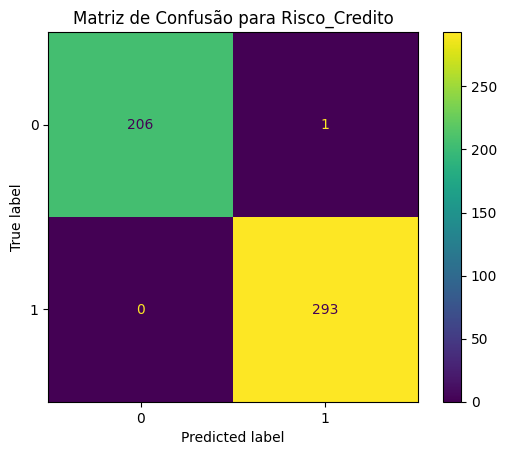


Matriz de Confusão para Risco_Compliance


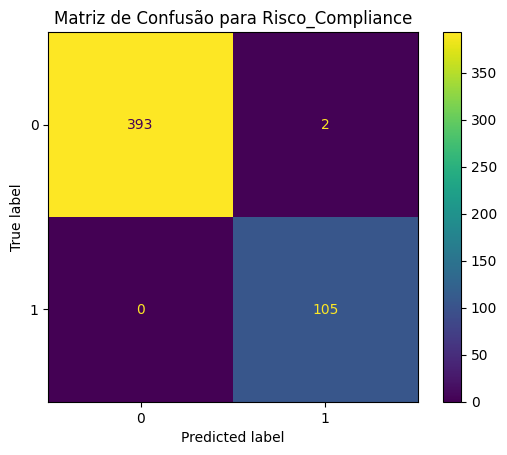


Matriz de Confusão para Risco_Mercado


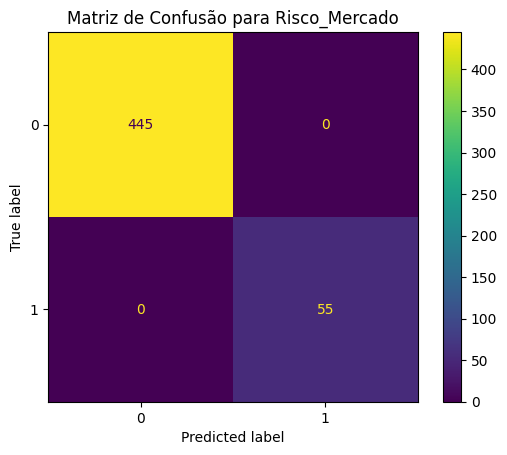

In [52]:
# Visualizar a Matriz de Confusão de cada Target (Classe)
for i, target in enumerate(targets):
    print(f'\nMatriz de Confusão para {target}')
    conf_matrix = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
    fig = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
    fig.plot()
    plt.title(f'Matriz de Confusão para {target}')
    plt.show()

In [53]:
# Calcular o Logloss para cada target
print('Log Loss por Target')
for i, target in enumerate(targets):
    log_loss_score = log_loss(y_test.iloc[:, i], y_pred[:, i])
    print(f'{target}: {log_loss_score:.4f}')

Log Loss por Target
Risco_Credito: 0.0721
Risco_Compliance: 0.1442
Risco_Mercado: 0.0000


- Extraindo as métricas conseguimos chegar a conclusão de que este é um modelo que performou muito bem.

- Na Matrix de Confunsão o modelo se mostrou muito acertivao, as métricas de precisão e acurácia estão bem altas, mas no final, o que ajudou a concluir o potencial do modelo foi a métrica Log Loss, que mede o desempenho de modelos probabilisticos, quanto menor o valor da métrica mais acertivo é o modelo.
 
- No final o modelo teve um indice alto de acertividade para Risco Credito, um desempenho bom para Rico Compliance, podendo melhorar, e está perfeito para Risco Mercado (ou com alerta de overfitting)

#### Verificando confiabilidade do Modelo

In [57]:
print("Verificando Overfitting\n" + "-"*30)

for i, target in enumerate(targets):
    # Obter os valores reais
    y_train_target = y_train[target]
    y_test_target = y_test[target]
    
    # Obter probabilidades da classe 1 para treino e teste
    y_train_proba = ovr_model.predict_proba(X_train)[:, i]
    y_test_proba = ovr_model.predict_proba(X_test)[:, i]
    
    # Calcular log loss
    logloss_train = log_loss(y_train_target, y_train_proba, labels=[0, 1])
    logloss_test = log_loss(y_test_target, y_test_proba, labels=[0, 1])
    
    print(f"{target}")
    print(f" - Log Loss Treino: {logloss_train:.4f}")
    print(f" - Log Loss Teste : {logloss_test:.4f}")
    print()


Verificando Overfitting
------------------------------
Risco_Credito
 - Log Loss Treino: 0.0010
 - Log Loss Teste : 0.0042

Risco_Compliance
 - Log Loss Treino: 0.0007
 - Log Loss Teste : 0.0061

Risco_Mercado
 - Log Loss Treino: 0.0002
 - Log Loss Teste : 0.0002



### Interpretabilidade do Modelo

In [58]:
# importancia das variáveis - para cada target

for i, target in enumerate(targets):
    # Obter a importancia das featurers
    importancias = ovr_model.estimators_[i].feature_importances_
    nomes_features = X.columns.tolist()

    # Criar um DataFrame com as importancias e nomes de features
    df_importancias = pd.DataFrame({'feature': nomes_features, 'importancia': importancias})

    # Ordenar o DataFrame
    df_importancias = df_importancias.sort_values('importancia', ascending=False).reset_index(drop=True)

    # Montar Plot
    fig = px.bar(
        df_importancias.head(10),
        x='importancia',
        y='feature',
        orientation='h',
        title=f'Importância das 10 principais features - {target}',
        labels={'importancia': 'Importância', 'feature': 'Features'},
        color='importancia',
        color_continuous_scale='ArmyRose'
    )

    # Personalizar o Layout
    fig.update_layout(
        height=600,
        yaxis={'categoryorder': 'total ascending'}
    )

    fig.show()

In [ ]:
# Visualizar exwmplo de árvore
modelo_catboost = ovr_model.estimators_[0]

# Criar o Pool com os dados de treinamento
pool = Pool(
    data=X_train,
    label=y_train.iloc[:, 0],
    cat_features=features_categoricas.tolist(),
    feature_names=list(X_train.columns)
)

# Plotar a árvore
modelo_catboost.plot_tree(tree_idx=0, pool=pool)

In [64]:
# Shap Values

# Criar e Rodar os explainers para cada target
explainers = []
shap_values = []

for i, target in enumerate(targets):
    print(f'Calculando Shap Values para {target}...')

    # Usar TreeExplainer específico para CatBoost
    explainer = shap.TreeExplainer(ovr_model.estimators_[i])

    # Calcular valores SHAP 
    shap_values_target = explainer.shap_values(X_test)

    # Atualizo as Listas
    explainers.append(explainer)
    shap_values.append(shap_values_target)



Calculando Shap Values para Risco_Credito...
Calculando Shap Values para Risco_Compliance...
Calculando Shap Values para Risco_Mercado...



Grafico SHAP para Risco_Credito: 


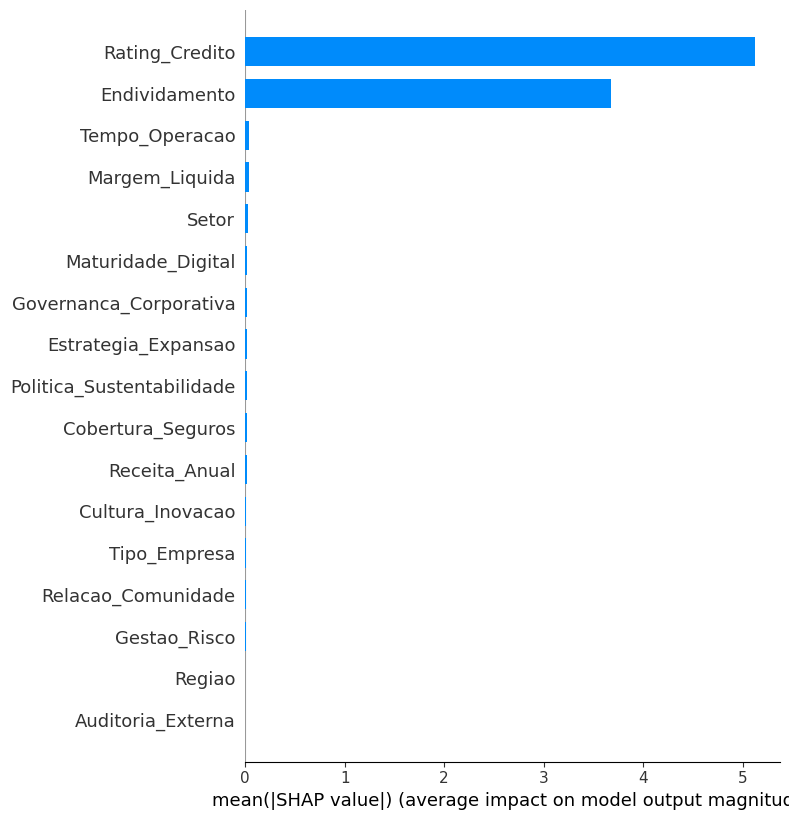

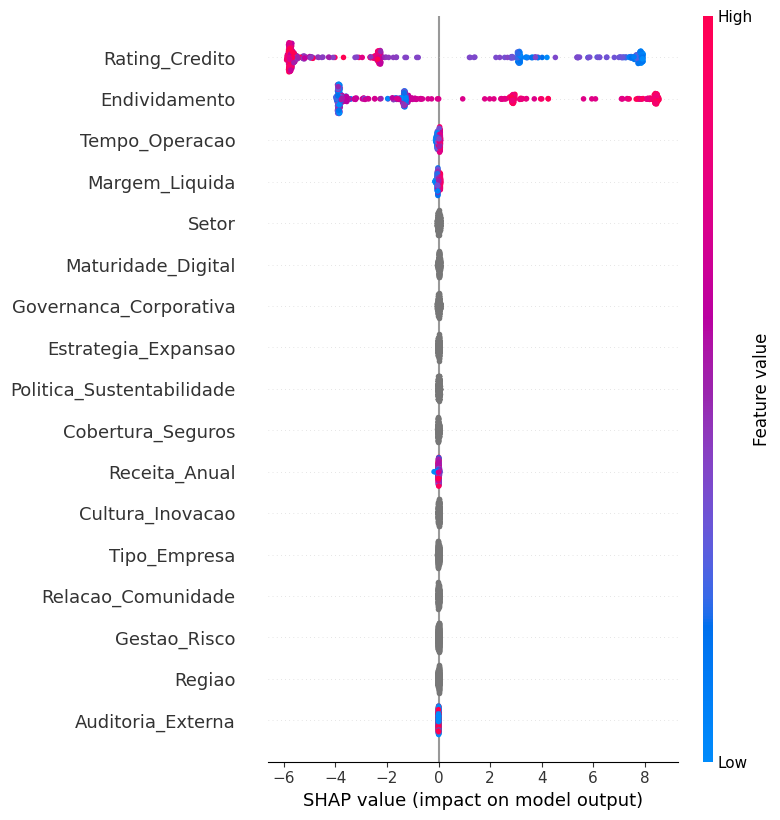


Grafico SHAP para Risco_Compliance: 


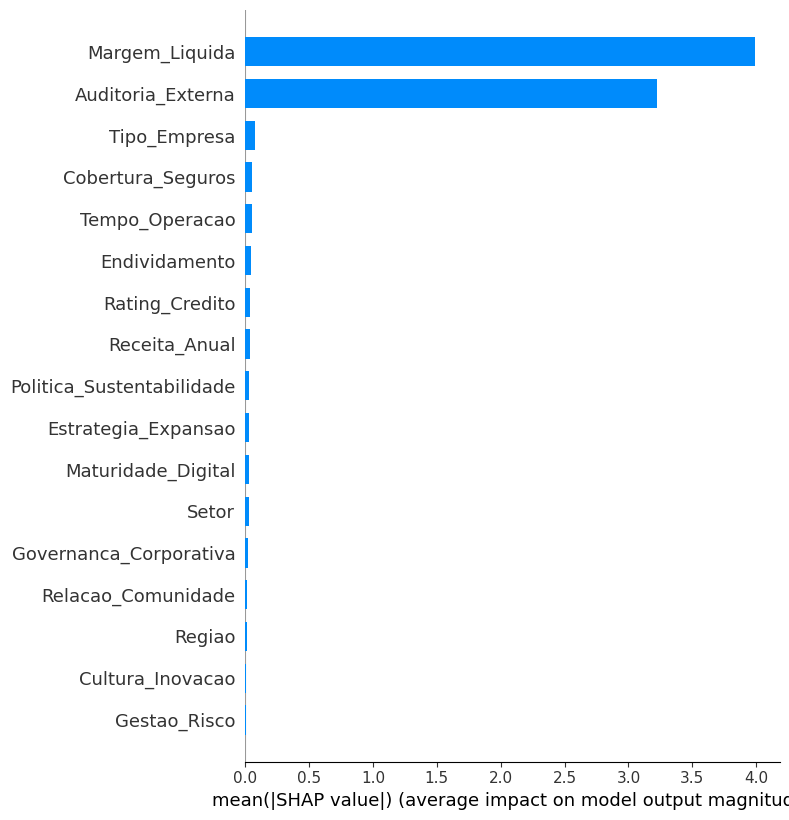

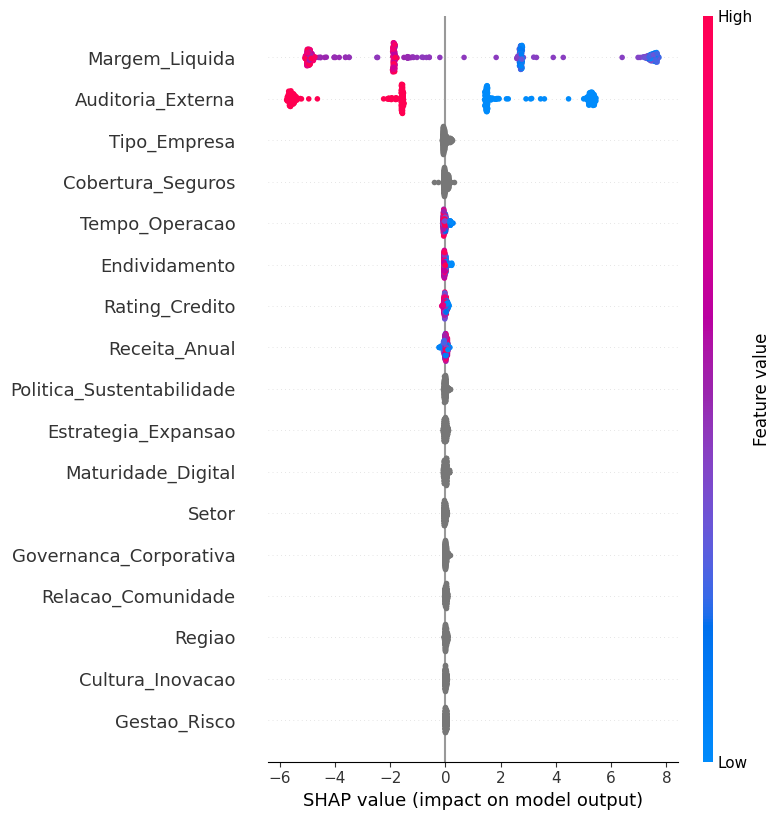


Grafico SHAP para Risco_Mercado: 


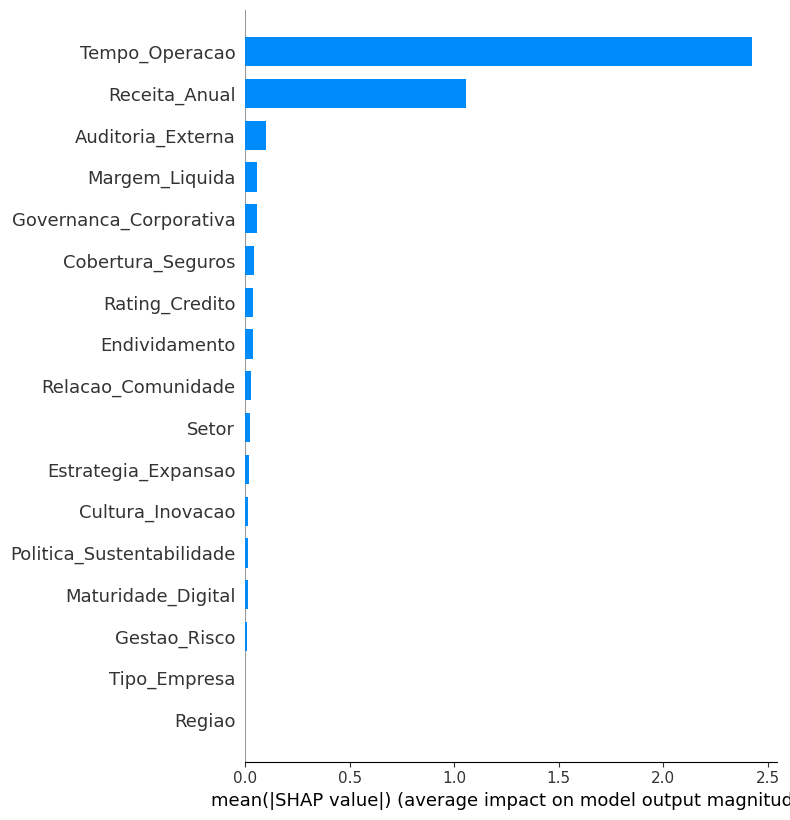

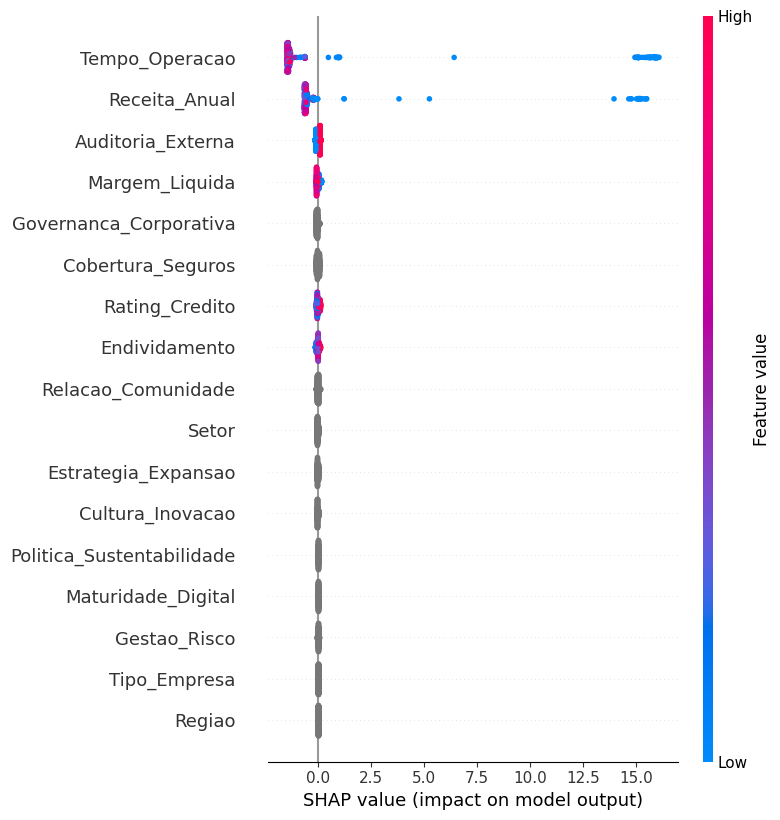

In [66]:
# Plotar Gráficos de SHAP para cada target
for i, target in enumerate(targets):
    print(f'\nGrafico SHAP para {target}: ')
    
    # Criar o gráfico de resumo de SHAP
    shap.summary_plot(
        shap_values[i],
        X_test,
        plot_type='bar',
        title=f'Contribuição Global das Variáveis - {target}',
        show=False
    )
    plt.tight_layout()
    plt.show()

    # Criar o gráfico de resumo de SHAP
    shap.summary_plot(
        shap_values[i],
        X_test,
        title=f'Distribuição dos Valores SHAP - {target}',
        show=False
    )
    plt.tight_layout()
    plt.show()